In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import sys  
sys.path.insert(0, '/Users/ellabutler/400B--EllaB/MW')
sys.path.insert(0, '/Users/ellabutler/400B--EllaB/M31')
sys.path.insert(0, '/Users/ellabutler/400B--EllaB/M33')

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterofMass import CenterOfMass



[-2.07  2.95 -1.45]
[ 0.94  6.32 -1.35] km / s


In [2]:
def OrbitCOM(galaxy, start, end, n=5): 
    """
    A function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    
    inputs:
    galaxy : str
        The name of the galaxy (e.g., "MW", "M31", "M33").
    start : int
        The starting snapshot number.
    end : int
        The ending snapshot number.
    n : int, optional
        The interval at which snapshots are processed (default is 5).
    
    output:
    A text file with the time, x, y, z, vx, vy, and vz of the COM for the galaxy.
    """
    # Compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"

    # Set tolerance and volDec for calculating COM_P in CenterOfMass
    delta = 0.1 
    volDec = 2 if galaxy != "M33" else 4  # Volume reduction factor for M33
    
    # Generate snapshot IDs to be processed
    snap_ids = np.arange(start, end + 1, n)
    if len(snap_ids) == 0:
        print("Error: No snapshots selected.")
        return
    
    # Initialize array to store orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros((len(snap_ids), 7))
    
    # Loop over selected snapshots
    for i, snap_id in enumerate(snap_ids):
        snap_str = f"{snap_id:03d}"  # Format snapshot number with leading zeros
        filename = f"./{galaxy}/{galaxy}_{snap_str}.txt"
        
        # Create a CenterOfMass object using disk particles (type 2)
        COM = CenterOfMass(filename, 2)
        
        # Compute the COM position and velocity
        COM_p = COM.COM_P(delta)
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
        
        # Store the results in the array
        orbit[i, 0] = COM.time / 1000  # Convert time to Gyr
        orbit[i, 1:4] = COM_p  # Store x, y, z positions
        orbit[i, 4:] = COM_v.value  # Store vx, vy, vz velocities
        
        # Print snap_id progress message
        print(f"Processed snapshot {snap_id}")
    
    # Save the computed orbit data to a text file
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
            header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                    .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    print(f"Orbit saved to {fileout}")

In [3]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

Processed snapshot 0
Processed snapshot 5
Processed snapshot 10
Processed snapshot 15
Processed snapshot 20
Processed snapshot 25
Processed snapshot 30
Processed snapshot 35
Processed snapshot 40
Processed snapshot 45
Processed snapshot 50
Processed snapshot 55
Processed snapshot 60
Processed snapshot 65
Processed snapshot 70
Processed snapshot 75
Processed snapshot 80
Processed snapshot 85
Processed snapshot 90
Processed snapshot 95
Processed snapshot 100
Processed snapshot 105
Processed snapshot 110
Processed snapshot 115
Processed snapshot 120
Processed snapshot 125
Processed snapshot 130
Processed snapshot 135
Processed snapshot 140
Processed snapshot 145
Processed snapshot 150
Processed snapshot 155
Processed snapshot 160
Processed snapshot 165
Processed snapshot 170
Processed snapshot 175
Processed snapshot 180
Processed snapshot 185
Processed snapshot 190
Processed snapshot 195
Processed snapshot 200
Processed snapshot 205
Processed snapshot 210
Processed snapshot 215
Processed 

In [6]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 

# Load the computed center of mass data
MW_data = np.loadtxt("Orbit_MW.txt")    # MW
M31_data = np.loadtxt("Orbit_M31.txt")  # M31
M33_data = np.loadtxt("Orbit_M33.txt")  # M33

# Extract columns
time = MW_data[:, 0]  # Time in Gyr
MW_pos = MW_data[:, 1:4]  # x, y, z position
M31_pos = M31_data[:, 1:4]
M33_pos = M33_data[:, 1:4]
MW_vel = MW_data[:, 4:]   # vx, vy, vz velocity
M31_vel = M31_data[:, 4:]
M33_vel = M33_data[:, 4:]


In [7]:
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

# Compute the separation magnitude
sep_MW_M31 = np.linalg.norm(MW_pos - M31_pos, axis=1)  # MW - M31
sep_M33_M31 = np.linalg.norm(M33_pos - M31_pos, axis=1)  # M33 - M31


In [8]:
# Determine the magnitude of the relative position and velocities 

# Compute the velocity magnitude
vel_MW_M31 = np.linalg.norm(MW_vel - M31_vel, axis=1)  # MW - M31
vel_M33_M31 = np.linalg.norm(M33_vel - M31_vel, axis=1)  # M33 - M31



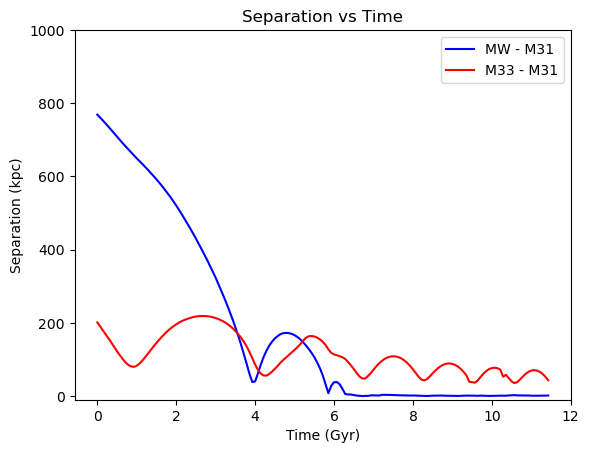

In [16]:
# Plot the Orbit of the galaxies 
#################################

# Set figure size

# Plot Separation vs Time
plt.ylim(-10, 1000)
plt.plot(time, sep_MW_M31, label="MW - M31", color="blue")
plt.plot(time, sep_M33_M31, label="M33 - M31", color="red")
plt.xlabel("Time (Gyr)")
plt.ylabel("Separation (kpc)")
plt.title("Separation vs Time")
plt.legend()
plt.savefig("SeparationvsTime.png")

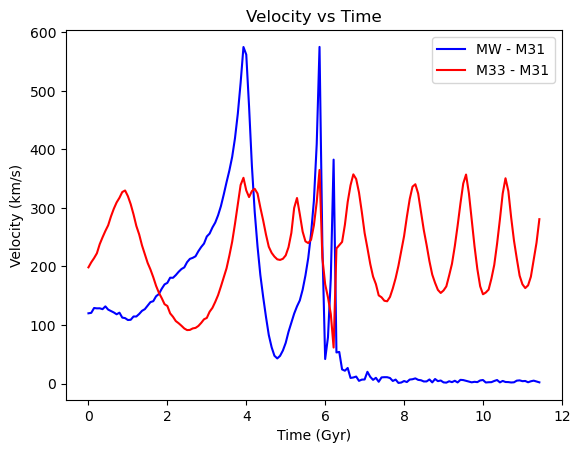

In [15]:
# Plot the orbital velocities of the galaxies 
#################################

# Plot Velocity vs Time
plt.plot(time, vel_MW_M31, label="MW - M31", color="blue")
plt.plot(time, vel_M33_M31, label="M33 - M31", color="red")
plt.xlabel("Time (Gyr)")
plt.ylabel("Velocity (km/s)")
plt.title("Velocity vs Time")
plt.legend()
plt.savefig("VelocityvsTime.png")

In [10]:
# Show the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
# Questions

# 1. From the velocity vs. time and separation vs. time plots, 
# the separation plot shows the distance between MW and M31 
# decreasing sharply around the 4 Gyr mark. The oscillations 
# in separation after that suggest MW and M31 will 
# experience at least two more close encounters before merging.

# 2. The velocity spikes occur when the galaxies approach each other, 
# corresponding to decreasing separation. When they move apart after an 
# encounter, the velocity decreases. Over time, both separation and velocity 
# will decrease, showing the effect of dynamical friction on MW and M31. 
# Because of this friction, they will lose orbital energy and eventually merge.

# 3. The separation plot shows MW and M31 approaching zero separation at around 6 Gyr.
# M33’s orbit (red) becomes more oscillatory after 6 Gyr. This suggests it is still bound to
# the MW-M31 remnant, and will interact with said remnant. The decay in M33's orbital 
# separation suggests it will eventually merge with the remnant.

# 4. BONUS
# Looking at the separation plot (red curve) after 6 Gyr, the distance of M33’s apocenters decreases with time.

# The decay rate is estimated as delta_R/t
# where delta_R is the difference between two successive apocenters and t is the orbital period.

# From the plot, the apocenter drops around 10–15 kpc per cycle (~1.5–2 Gyr). From this, the approximate 
# decay rate is 5–7 kpc per Gyr.

# If M33 is 75 kpc away, with a constant decay rate of ~6 kpc per Gyr, the estimated time it will 
# take for M33 to merge with the MW-M31 remnant is 12.5 Gyr.